<a href="https://colab.research.google.com/github/HuynhQuocDan/Artificial-Intelligence/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=fcbd3d19eb293df1cb5ed5645f919dbf00671f697be334188b34a1f7c4dc5037
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


35.46561455689926


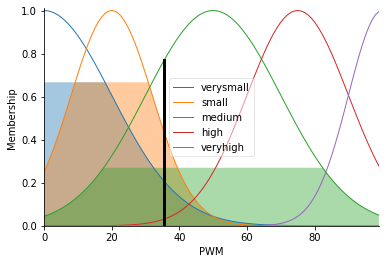

In [22]:
#điều khiển động cơ DC (điều hòa nhiệt đ)
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


#tạo biến mờ
setpoint = ctrl.Antecedent(np.arange(12,33,1), 'setpoint')
sensor = ctrl.Antecedent(np.arange(-3,60,0.25), 'sensor')
PWM = ctrl.Consequent(np.arange(0,100,1), 'PWM')

#chú thích: VS-very small, S-small, M-normal, H-high, VH- very high
setpoint['cold'] = fuzz.trimf(setpoint.universe,[12,12,15])
setpoint['cool'] = fuzz.trimf(setpoint.universe,[12,15,18])
setpoint['normal'] = fuzz.trimf(setpoint.universe,[16,20,22])
setpoint['warm'] = fuzz.trimf(setpoint.universe,[20,25,27])
setpoint['hot'] = fuzz.trimf(setpoint.universe,[27,30,33])
#sensor.view()

sensor['cold'] = fuzz.gaussmf(sensor.universe,[0],10)
sensor['cool'] = fuzz.gaussmf(sensor.universe,[6],12)
sensor['normal'] = fuzz.gaussmf(sensor.universe,[10],11)
sensor['warm'] = fuzz.gaussmf(sensor.universe,[25],7)
sensor['hot'] = fuzz.gaussmf(sensor.universe,[35],21)
#sensor.view()

PWM['verysmall'] = fuzz.gaussmf(PWM.universe,[0],20)
PWM['small'] = fuzz.gaussmf(PWM.universe,[20],12)
PWM['medium'] = fuzz.gaussmf(PWM.universe,[50],20)
PWM['high'] = fuzz.gaussmf(PWM.universe,[75],15)
PWM['veryhigh'] = fuzz.gaussmf(PWM.universe,[100],10)
#PWM.view()

rule1 = ctrl.Rule(setpoint['cold'] & sensor['cold'],PWM['small'])
rule2 = ctrl.Rule(setpoint['cold'] & sensor['cool'],PWM['medium'])
rule3 = ctrl.Rule(setpoint['cold'] & sensor['normal'],PWM['high'])
rule4 = ctrl.Rule(setpoint['cold'] & sensor['warm'],PWM['high'])
rule5 = ctrl.Rule(setpoint['cold'] & sensor['hot'],PWM['veryhigh'])
rule6 = ctrl.Rule(setpoint['cool'] & sensor['cold'],PWM['verysmall'])
rule7 = ctrl.Rule(setpoint['cool'] & sensor['cool'],PWM['small'])
rule8 = ctrl.Rule(setpoint['cool'] & sensor['normal'],PWM['small'])
rule9 = ctrl.Rule(setpoint['cool'] & sensor['warm'],PWM['medium'])
rule10 = ctrl.Rule(setpoint['cool'] & sensor['hot'],PWM['medium'])
rule11 = ctrl.Rule(setpoint['normal'] & sensor['cold'],PWM['verysmall'])
rule12 = ctrl.Rule(setpoint['normal'] & sensor['cool'],PWM['verysmall'])
rule13 = ctrl.Rule(setpoint['normal'] & sensor['normal'],PWM['small'])
rule14 = ctrl.Rule(setpoint['normal'] & sensor['warm'],PWM['medium'])
rule15 = ctrl.Rule(setpoint['normal'] & sensor['hot'],PWM['medium'])
rule16 = ctrl.Rule(setpoint['warm'] & sensor['cold'],PWM['verysmall'])
rule17 = ctrl.Rule(setpoint['warm'] & sensor['cool'],PWM['verysmall'])
rule18 = ctrl.Rule(setpoint['warm'] & sensor['normal'],PWM['small'])
rule19= ctrl.Rule(setpoint['warm'] & sensor['warm'],PWM['small'])
rule20 = ctrl.Rule(setpoint['warm'] & sensor['hot'],PWM['medium'])
rule21 = ctrl.Rule(setpoint['hot'] & sensor['cold'],PWM['verysmall'])
rule22 = ctrl.Rule(setpoint['hot'] & sensor['cool'],PWM['verysmall'])
rule23 = ctrl.Rule(setpoint['hot'] & sensor['normal'],PWM['small'])
rule24= ctrl.Rule(setpoint['hot'] & sensor['warm'],PWM['small'])
rule25 = ctrl.Rule(setpoint['hot'] & sensor['hot'],PWM['medium'])

PWMing_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
PWMing=ctrl.ControlSystemSimulation(PWMing_ctrl)
PWMing.input['setpoint']=29
PWMing.input['sensor']=1
PWMing.compute()
print(PWMing.output['PWM'])
PWM.view(sim=PWMing)
